# Credit Card Capstone Project
When analyzing credit cards companies customer churn, we will be predicting the variables which have a major impact on customer retention.

### Null Hypothesis
The variables do not have an effect on attrition rate of our credit card attrition rate.

### Alternate Hypothesis
The variables in this dataset have an effect on attrition rate and influence credit card cliental attrition

#### What does churn stand for?
Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry (in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

#### Why do businesses want to prevent churn?
Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

In this analysis we can focus on customer retention programs and how can the company benefit from it.

#### Questions to answer while doing this analysis
<ol><li> Demographics </li>
    <li> Customer Account Information </li>
    <li> Correlation </li>
    </ol>

In [241]:
# import modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white')

In [167]:
df = pd.read_csv("BankChurners.csv")

In [168]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Exploratory Data Analysis
1) CLIENTNUM: Unique ID to represent each customer
 
2) Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0; Shows existing and non-existing customers ['Existing Customer', 'Attrited Customer']

3) Customer_Age: Demographic variable - Customer's Age in Years

4) Gender: Demographic variable - M=Male, F=Female (M / F)

5) Dependent_count: Demographic variable - Number of dependents. 

6) Education_Level: Demographic variable - Educational Qualification of the account holder 

7) Marital_Status: Information on customers marital status 

8) Income_Category: Demographic variable - Annual Income Category of the account holder 

9) Card_Category: Product Variable - Type of Card 

10) Months_on_book: Period of relationship with bank (measured by months) 

11) Total_Relationship_Count: Total no. of products held by the customer 

12) Months_Inactive_12_mon: No. of months inactive in the last 12 months 

13) Contacts_Count_12_mon: No. of Contacts in the last 12 months 

14) Credit_Limit: Credit Limit on the Credit Card

15) Total_Revolving_Bal: Total Revolving Balance on the Credit Card 

16) Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) 

17) Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

18) Total_Trans_Amt: Total Transaction Amount (Last 12 months) 

19) Total_Trans_Ct: Total Transaction Count (Last 12 months) 

20) Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

21) Avg_Utilization_Ratio: Average Card Utilization Ratio

In [169]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [242]:
#drop the last two columns 
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis = 1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [170]:
df.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype=object)

In [171]:
# Dropping the last two columns which are of no use to this analysis
df_n = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis = 1)

In [34]:
df_n

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [172]:
# checking the data types of the columns in the dataset
df_n.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## 1) Demographics 
First understand the gender, age range, patner and dependent status of the customers

By looking at the gender, we can determine that our customers are approximately equally distributed between both the genders

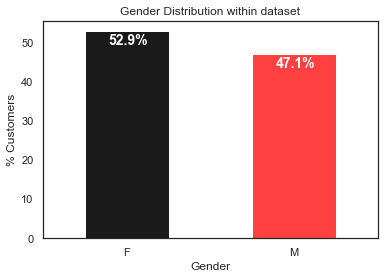

In [173]:
colors = ['#1A1A1A','#FF4040']
ax = (df_n['Gender'].value_counts()*100.0 /len(df_n)).plot(kind='bar', stacked = False, rot = 0, color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution within dataset')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.14, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='White',
           weight = 'bold')
    

The Bar chart above tells us that 52.9% of our clients are females and 47.1% are male

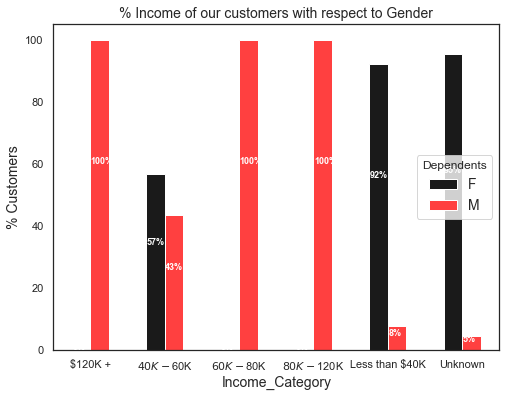

In [238]:
colors = ['#1A1A1A','#FF4040']
partner_dependents = df_n.groupby(['Income_Category','Gender']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = False,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
#Axis and legend labels
ax.legend(loc='right',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Income of our customers with respect to Gender',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.03*width, p.get_y()+0.6*height),
                color = 'white',
               weight = 'bold',
               size = 9)

Text(0.5, 1.0, 'Marital Status of our Customers')

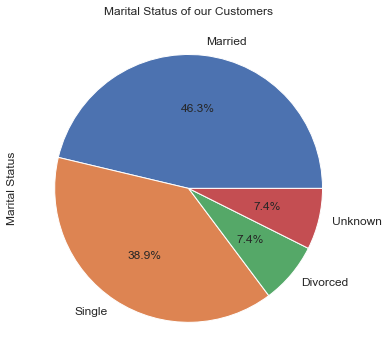

In [239]:
ax = (df_n['Marital_Status'].value_counts()*100.0 /len(df_n))\
.plot.pie(autopct='%.1f%%', labels = ['Married','Single','Divorced','Unknown'],figsize =(6,7), fontsize = 12 )                                                                           
ax.set_ylabel('Marital Status',fontsize = 12)
ax.set_title('Marital Status of our Customers', fontsize = 12)


46.3% of our Clients are married and ~ 38.9% are single and so on.

## 2) Customer Account Information 

In [244]:
df_n.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


Text(0.5, 1.0, 'How many months do the customers stay with our company?')

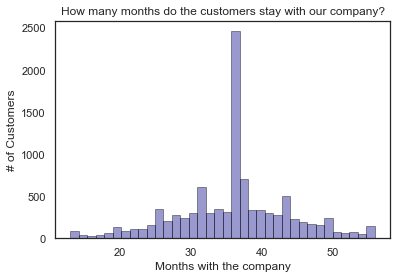

In [246]:
ax = sns.distplot(df_n['Months_on_book'], kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Months with the company')
ax.set_title('How many months do the customers stay with our company?')

In [251]:
# median
np.median(df_n['Months_on_book'])

36.0

In [252]:
# mean
np.mean(df_n['Months_on_book'])

35.928409203120374

## Insight 
While finishing the analysis of the histogram, we can predict that most of our customers tend to stay with us for 30 to 40 months, whereas almost 2500 customers stay with our company for almost 36 months.

The mean for the histogram is 35.92 and median is 36 months.

Text(0.5, 1.0, 'Our customers income category')

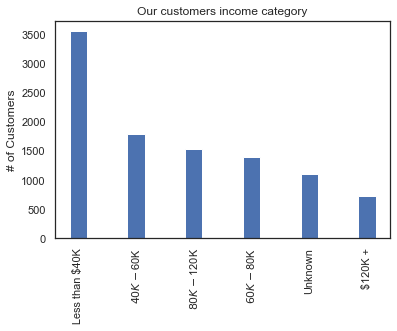

In [128]:
ax = df_n['Income_Category'].value_counts().plot(kind = 'bar',rot = 90, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('Our customers income category')

When looking at the income of our customers we can see that majority of our customers make less than $40K followed by 40K-60K and henceforeward

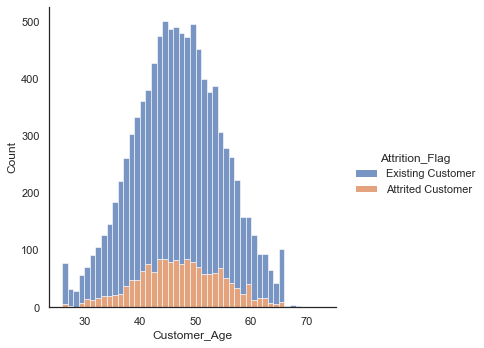

In [243]:
sns.displot(df_n, x="Customer_Age", hue="Attrition_Flag", multiple="stack")

Customer Age shows the distribution of registered customers across the ages, we are able to see the distribution of both attrited and existing customers. By viewing this visualization we can determine that customer age has no relationship with both existing and attrited customers.

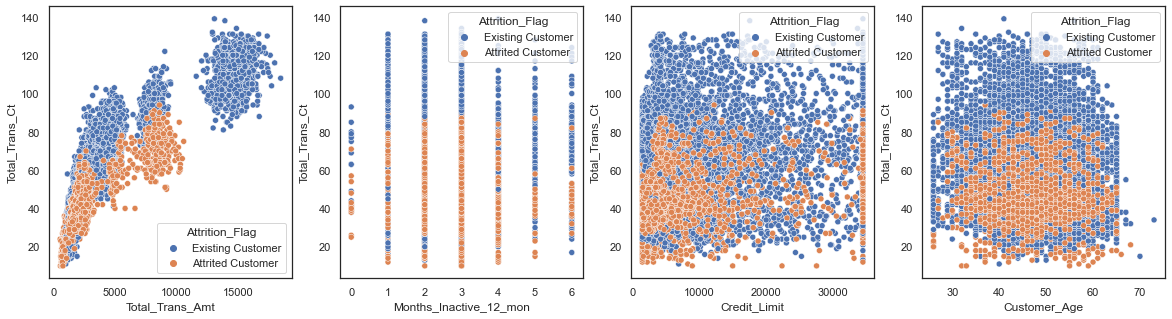

In [131]:
df_n=pd.concat([df['Customer_Age'],df['Total_Trans_Ct'],df['Total_Trans_Amt'],df['Months_Inactive_12_mon'],df['Credit_Limit'],df['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))

sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_n,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

From the 4 graphs above we can point out the following hypothesis:

1. The higher they spend annually, the customers are more likely to remain.
2. After 2-3 months of inactivity, the customers are more likely to leave.
3. The higher the credit limit is, the customers are more likely to remain.
4. Age distribution does not really matter, because the clusters are largely overlapped.
5. Almost all attrited customers used their cards below 100 times.

## 3) Correlation
Since we have a dataset with mixed features: categorical and numerical, we cannot simply use standard correlation function (Pearson coefficient). We will have to split the features into separate tables, and we measure numerical data correlation via Pearson, and categorical data via Cramer's V function.


In [237]:
df_categorical=df.loc[:,df.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_82149/2108028553.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical=df.loc[:,df.dtypes==np.object]


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [154]:
df_numerical=df.loc[:,df.dtypes!=np.object]
df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical= df_numerical.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis = 1)

df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_82149/3782018426.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_numerical=df.loc[:,df.dtypes!=np.object]
/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_82149/3782018426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


/var/folders/x6/nzby73792t956q8yhk8yst1r0000gn/T/ipykernel_82149/2406875999.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_num, dtype=np.bool))


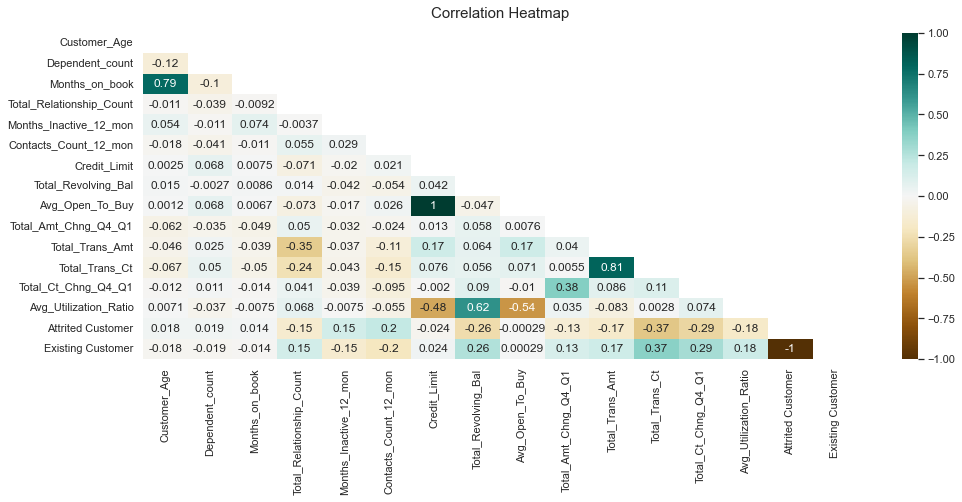

In [151]:
from scipy import stats
corr_num = df_numerical.corr()
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr_num, dtype=np.bool))
num_heatmap = sns.heatmap(corr_num, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=15);

By doing this correlation, we are able to determine that Customer Age positively correlates with their tenure with the bank, which means that the higher the age of a customer the more months he stays with the company.

When comparing credit limit, it has little to no correlation between customer churn. This proves to the fact that credit limit has no impact on attrition of a customer. Thus, we can say that whether the credit limit is higher or lower it does not have any impacts on our customer service

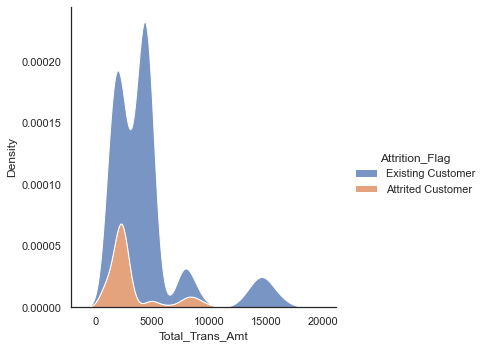

In [187]:
sns.displot(df_n, x="Total_Trans_Amt", hue="Attrition_Flag", multiple="stack", kind="kde")

Through this visualization we are able to predict that there are fewer to no churned customers for transaction exceeding 5000 implying most churned customers have a total transaction amount between 0 - 5000 in the last 12 months

In [216]:
data_c = df_n.corr()

In [240]:
data_c.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663


In [275]:
df_numerical.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1


In [256]:
df_nol = df_numerical[['Attrited Customer','Credit_Limit']]
df_nol.corr()

,Attrited Customer,Credit_Limit
Attrited Customer,1.000000,-0.023873
Credit_Limit,-0.023873,1.000000


In [257]:
df_nol = df_numerical[['Attrited Customer','Total_Trans_Ct']]
df_nol.corr()

,Attrited Customer,Total_Trans_Ct
Attrited Customer,1.000000,-0.371403
Total_Trans_Ct,-0.371403,1.000000


In [258]:
df_nol = df_numerical[['Attrited Customer','Total_Trans_Amt']]
df_nol.corr()

,Attrited Customer,Total_Trans_Amt
Attrited Customer,1.000000,-0.168598
Total_Trans_Amt,-0.168598,1.000000


In [259]:
df_nol = df_numerical[['Attrited Customer','Total_Revolving_Bal']]
df_nol.corr()

,Attrited Customer,Total_Revolving_Bal
Attrited Customer,1.000000,-0.263053
Total_Revolving_Bal,-0.263053,1.000000


In [260]:
df_nol = df_numerical[['Attrited Customer','Total_Relationship_Count']]
df_nol.corr()

,Attrited Customer,Total_Relationship_Count
Attrited Customer,1.000000,-0.150005
Total_Relationship_Count,-0.150005,1.000000


In [261]:
df_nol = df_numerical[['Attrited Customer','Months_on_book']]
df_nol.corr()

,Attrited Customer,Months_on_book
Attrited Customer,1.000000,0.013687
Months_on_book,0.013687,1.000000


In [262]:
df_nol = df_numerical[['Attrited Customer','Dependent_count']]
df_nol.corr()

,Attrited Customer,Dependent_count
Attrited Customer,1.000000,0.018991
Dependent_count,0.018991,1.000000


In [263]:
df_nol = df_numerical[['Attrited Customer','Customer_Age']]
df_nol.corr()

,Attrited Customer,Customer_Age
Attrited Customer,1.000000,0.018203
Customer_Age,0.018203,1.000000


In [264]:
df_nol = df_numerical[['Attrited Customer','Months_Inactive_12_mon']]
df_nol.corr()

,Attrited Customer,Months_Inactive_12_mon
Attrited Customer,1.000000,0.152449
Months_Inactive_12_mon,0.152449,1.000000


In [265]:
df_nol = df_numerical[['Attrited Customer','Contacts_Count_12_mon']]
df_nol.corr()

,Attrited Customer,Contacts_Count_12_mon
Attrited Customer,1.000000,0.204491
Contacts_Count_12_mon,0.204491,1.000000


In [266]:
df_nol = df_numerical[['Attrited Customer','Avg_Open_To_Buy']]
df_nol.corr()

,Attrited Customer,Avg_Open_To_Buy
Attrited Customer,1.000000,-0.000285
Avg_Open_To_Buy,-0.000285,1.000000


In [267]:
df_nol = df_numerical[['Attrited Customer','Total_Amt_Chng_Q4_Q1']]
df_nol.corr()

,Attrited Customer,Total_Amt_Chng_Q4_Q1
Attrited Customer,1.000000,-0.131063
Total_Amt_Chng_Q4_Q1,-0.131063,1.000000


In [268]:
df_nol = df_numerical[['Attrited Customer','Total_Trans_Amt']]
df_nol.corr()

,Attrited Customer,Total_Trans_Amt
Attrited Customer,1.000000,-0.168598
Total_Trans_Amt,-0.168598,1.000000


In [270]:
df_nol = df_numerical[['Attrited Customer','Total_Trans_Ct']]
df_nol.corr()

,Attrited Customer,Total_Trans_Ct
Attrited Customer,1.000000,-0.371403
Total_Trans_Ct,-0.371403,1.000000


In [273]:
df_nol = df_numerical[['Attrited Customer','Avg_Utilization_Ratio']]
df_nol.corr()

,Attrited Customer,Avg_Utilization_Ratio
Attrited Customer,1.00000,-0.17841
Avg_Utilization_Ratio,-0.17841,1.00000


In [292]:
correlations = df_numerical.loc[ : , df_numerical.columns != 'Attrited Customer'].corrwith(df_numerical.Attrited Customer)
correlations = correlations[correlations !=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

SyntaxError: invalid syntax (420664007.py, line 1)

After completing the pearson correlation for attrited customers and comparing them with several variables mentioned in the dataset. I am able to analyze that Number of months inactive in the last 12 months and number of contacts in the last 12 months are positively correlated. Thus, if there is more contact with the clients who are inactive in the last 12 months, there is a possibility of reducing customer attrition.

We can also identify that total transaction count has a negative correlation with attrition flag, thus identifying a decrease in one variable and increase in another.

### Spearman R Correlation

In [230]:
from scipy.stats import spearmanr
spearmanr(df_n['Attrition_Flag'],df_n['Card_Category'])

SpearmanrResult(correlation=0.0035431740764954433, pvalue=0.7214531760740498)

In [225]:
spearmanr(df_n['Attrition_Flag'],df_n['Total_Trans_Amt'])

SpearmanrResult(correlation=0.2237821804822003, pvalue=3.91515016914661e-115)

In [226]:
spearmanr(df_n['Attrition_Flag'],df_n['Credit_Limit'])

SpearmanrResult(correlation=0.05090986869181691, pvalue=2.961132711298008e-07)

In [227]:
spearmanr(df_n['Attrition_Flag'],df_n['Total_Revolving_Bal'])

SpearmanrResult(correlation=0.2405510082979741, pvalue=2.921365786143734e-133)

In [233]:
spearmanr(df_n['Attrition_Flag'],df_n['Income_Category'])

SpearmanrResult(correlation=-0.019574855764033762, pvalue=0.048858779793655084)

In [228]:
spearmanr(df_n['Attrition_Flag'],df_n['Total_Relationship_Count'])

SpearmanrResult(correlation=0.14967404402196685, pvalue=8.092007151645958e-52)

### Insights

Spearman's rank order correlation measures the strength and direction of association between two ranked variables.
After completing the correlation between Attrition Flag and other variables, I can analyze that both total transaction amounts and total revolving balance have a weak correlation with the column attrition flag

## Conclusion 



While completing the analysis of the dataset involving churning of clients, I am able to determine that there are variables which positively and negatively correlate with attrition.

We are able to determine how total transaction amounts and total revolving balance of a client have a weak positive correlation with attrition flag. I was amazed to see that while using our services for 2-3 months clients tend to leave our company. Clients with a higher limit tend to stay with the company and the churning rate with these clients is extremely low.

A huge population of churned clients come from clients who have less than 100 transactions

Also, when using pearson's correlation coefficient, I am able to predict that to stop or reduce the churning of customers our company should follow up with clients who are inactive in the last 12 months. Thus following up with clients will in return reduce customer churn.

While applying spearman's correlation and analyzing the p-value, I am able to say that variables such as 

I can accpet the null hypothesis and claim that card category has no relationship with customer churning, however when comparing other variables such as Total Transaction Amount, Credit Limit, Total Revolving Balance and Total Relationship Count we can see view a small p-value which tells us to accept the alternate hypothesis. Stating the fact that there is a relationship between customer churning and other variables.